In this notebook we will look at how we can build and visualaize a decision tree.  The data in this paper is taken from a 2016 paper by [Wicker and Cooper](https://pubs.acs.org/doi/10.1021/acs.jcim.6b00565), describing a molecular descriptor designed to capture molecular flexibility,

Let's start by importing the necessary Python libraries.

In [1]:
import pandas as pd
import janitor
from sklearn import tree
from dtreeviz.trees import *
from sklearn.metrics import matthews_corrcoef

We start by reading the training set. 

In [2]:
train_df = pd.read_csv("train_desc_with_names.csv")

Let's take a look at the names of the columns in the dataframe.

In [3]:
train_df.columns

Index(['Unnamed: 0', 'MolWt', 'HeavyAtomMolWt', 'NumRadicalElectrons',
       'NumValenceElectrons', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v',
       ...
       'R6', 'R7', 'R8', 'R9', 'RG10', 'AFRC', 'BFRC', 'nConf20', 'Label',
       'Label names'],
      dtype='object', length=223)

Note that some of the column names have spaces, which can be somewhat inconvenient. Fortunately, the PyJanitor library has functions that enable us to do all sorts of data cleaning. We can use the "clean_names" function to remove the spaces from the column names. We are also taking advantage of the very cool method chaining capability provided by PyJanitor.

In [4]:
train_df = (train_df.clean_names(case_type="preserve")
            .remove_columns(["Unnamed_0","Label_names"]))

Next, we can extract the x variables (descriptors) and the y variables (response) from the dataframe.

In [5]:
train_X = train_df.remove_columns(["Label"])
train_y = train_df.Label

Time to build the model, let's instantiate a [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [6]:
cls = tree.DecisionTreeClassifier(max_depth=2) 

Next, we can train the classifier.

In [7]:
cls.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Now that we have the model, we can use the dtreeviz package to create a visualization.  The scikit-learn package has a method for displaying decision trees (see Figure 6 in [Wicker and Cooper](https://pubs.acs.org/doi/10.1021/acs.jcim.6b00565) for an example), but I haven't found it to be particularly useful.  I like the visualization in dtreeviz because it shows the relationships between the distributions and the decision tree.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


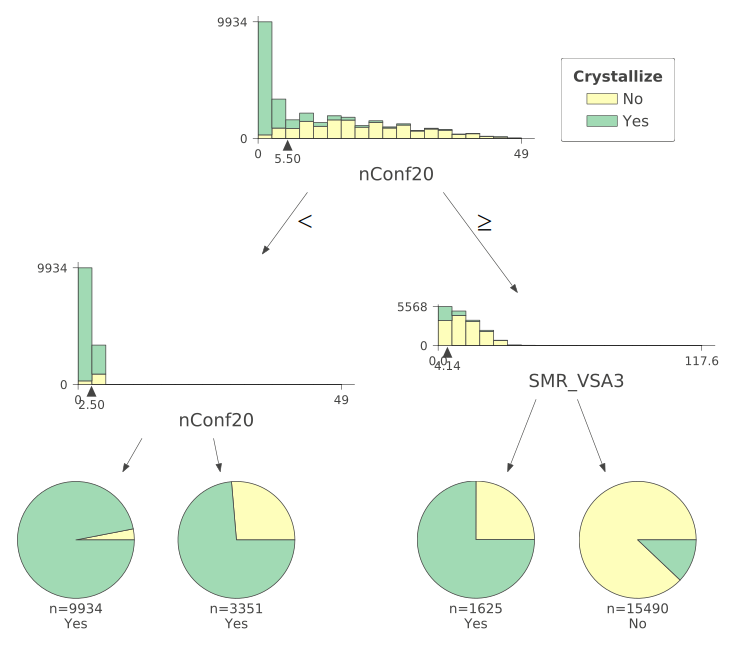

In [8]:
feature_names = list(train_X.columns)
viz = dtreeviz(cls, train_X, train_y, feature_names = feature_names, 
               target_name = "Crystallize",class_names=["No","Yes"],scale=2)
viz

It looks like the model is performing well, let's take a look at the performance on the test set.  First, we'll read the data and clean it with PyJanitor.

In [9]:
test_df = pd.read_csv("test_desc_with_names.csv")
test_df = (test_df.clean_names(case_type="preserve")
        .remove_columns(["Unnamed_0","Label_names"]))
test_X = test_df.remove_columns(["Label"])
test_y = test_df.Label


Now we can check the Matthews Correlation Coefficient for the test set.

In [10]:
pred = cls.predict(test_X)
matthews_corrcoef(test_y, pred)

0.7781038157491144